In [1]:
from apts import *
%matplotlib inline  

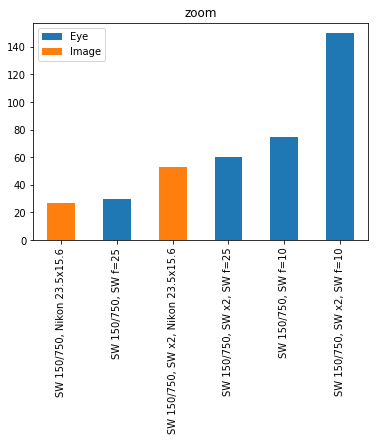

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot('zoom')

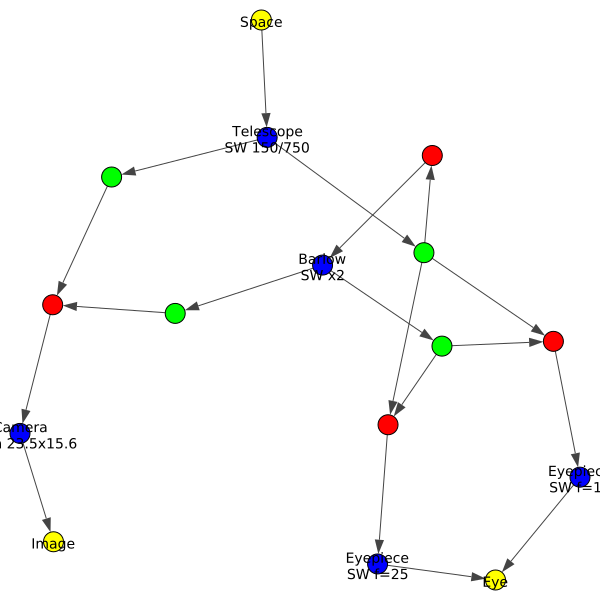

In [3]:
e.plot_connection_garph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

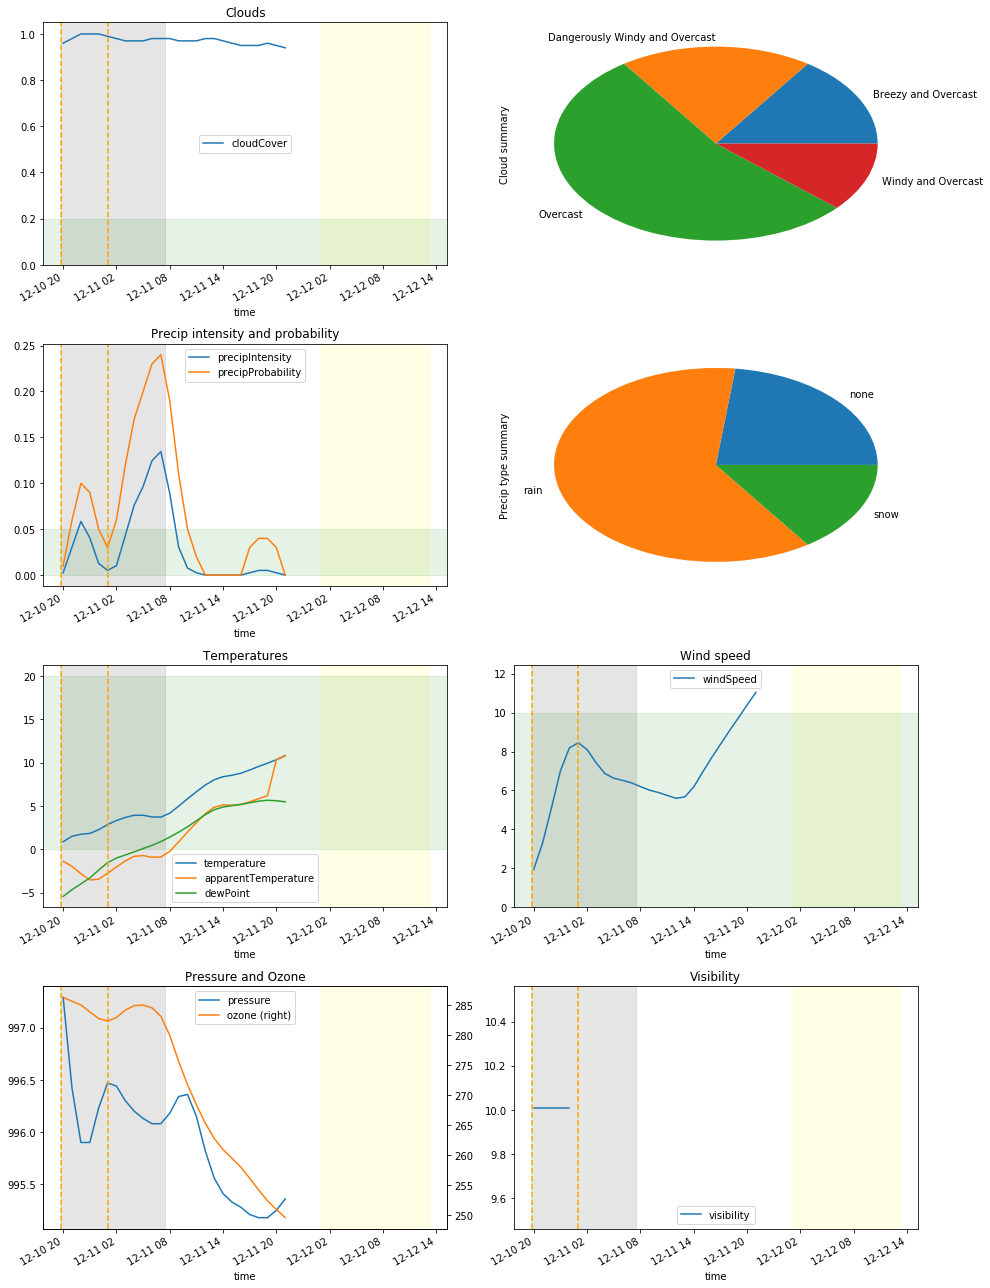

In [6]:
o.plot_weather()

In [7]:
o.weather_is_good()

False

In [8]:
n = Notify('lpozarlik@gmail.com')
n.send(o)

In [9]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
33,M34,-,NGC 1039,Open Cluster,Perseus,5.5,1400,2.700000,42.783333,35.0,35.0,2017-12-10 21:05:05.133400+01:00,82.697786
76,M77,Cetus A,NGC 1068,Spiral Galaxy,Cetus,8.9,60000000,2.711667,0.016667,7.0,6.0,2017-12-10 21:05:32.076286+01:00,39.945491
44,M45,"Seven Sisters,Pleiades. Subaru.",-,Open Cluster,Taurus,1.6,380,3.783333,24.120000,110.0,110.0,2017-12-10 22:09:48.822786+01:00,64.017369
78,M79,-,NGC 1904,Globular Cluster,Lepus,7.7,41100,5.408333,-24.550000,8.7,8.7,2017-12-10 23:46:43.325336+01:00,15.357228
37,M38,-,NGC 1912,Open Cluster,Auriga,7.4,4200,5.478333,35.833333,21.0,21.0,2017-12-10 23:51:22.427417+01:00,75.684951
0,M1,Crab Nebula,NGC 1952,Supernova Remnant,Taurus,8.4,6300,5.575000,22.016667,6.0,4.0,2017-12-10 23:57:01.839811+01:00,61.870292
41,M42,Great Orion Nebula,NGC 1976,Diffuse Nebula,Orion,4.0,1600,5.590000,-5.450000,85.0,60.0,2017-12-10 23:57:43.845830+01:00,34.418116
35,M36,-,NGC 1960,Open Cluster,Auriga,6.3,4100,5.601667,34.133333,12.0,12.0,2017-12-10 23:58:44.190879+01:00,73.982198
77,M78,-,NGC 2068,Diffuse Nebula,Orion,8.3,1600,5.778333,0.050000,8.0,6.0,2017-12-11 00:09:02.245229+01:00,39.909045
36,M37,-,NGC 2099,Open Cluster,Auriga,6.2,4400,5.873333,32.550000,24.0,24.0,2017-12-11 00:14:58.595111+01:00,72.392150


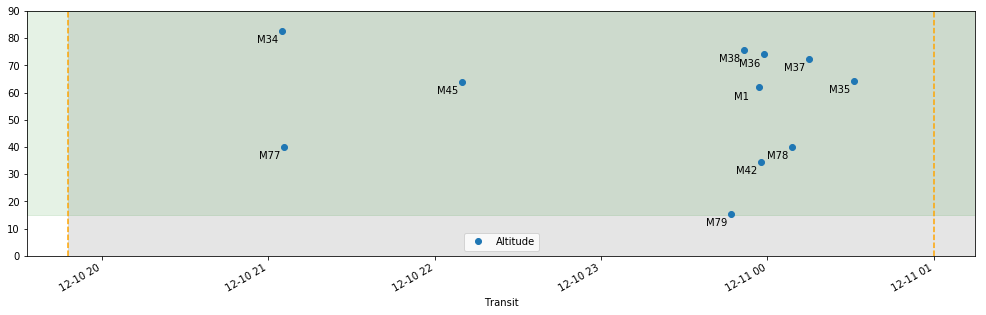

In [10]:
o.plot_messier()

In [11]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [12]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)